In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/sample.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv


## Load datasets

In [2]:
# load datasets from kaggle repository
df_train= pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv")
df_test= pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv")
sample_data = pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/sample.csv")
df_movies=pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv")

## Load required libraries

In [3]:
#load required libraries for manipulating, visualizing and summarizing given datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Exploratory Data Analysis (EDA)

In [4]:
#show first 5 rows of train datasets, this dataeset has 4 features and 1 label column(sentiment)
df_train.head()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE


In [5]:
#show first 5 rows of test datasets, this dataeset has 4 features
df_test.head()

,movieid,reviewerName,isTopCritic,reviewText
0,legend_marty_mcfly_oracle,John Kim,False,Green slowly cranks up the dread with style an...
1,terminator_katniss_everdeen_glimmer,Brian Chaney,False,Philip Noyce's direction is elegant and unforc...
2,james_bond_labyrinth_gollum,Danielle Parker,False,It wouldn't do to say what path Maria ultimate...
3,v_quest_han_solo_wondrous,Brittany Lane,False,Pig is not exactly the arthouse John Wick that...
4,enigma_hulk_surreal_starlight,Justin Willis,False,An imaginative no-budget musical of sorts abou...


In [6]:
#show first 5 rows of movies datasets, this dataeset has 14 features
df_movies.head(3)

,movieid,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,han_solo_heroic_myth_wonder_woman,Han Solo Heroic Myth Wonder Woman,50.0,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,Claude Nicolet,NaN,NaN,NaN
1,voyage_tyler_durden_han_solo_stardust,Voyage Tyler Durden Han Solo Stardust,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Nathan Haack,NaN,NaN,NaN
2,norman_bates_ferris_bueller_hermione_granger_v...,Norman Bates Ferris Bueller Hermione Granger V...,43.0,NaN,NaN,NaN,NaN,120.0,Drama,Korean,Theresa Smith,NaN,NaN,NaN


In [7]:
#check shape of each dataset
df_train.shape, df_test.shape, df_movies.shape

((162758, 5), (55315, 4), (143258, 14))

In [8]:
#Check null values in train datset; reviewText feature has 6447 null values

df_train.isna().sum()

movieid                  0
reviewerName             0
isFrequentReviewer       0
reviewText            6447
sentiment                0
dtype: int64

In [9]:
#Check null values in test datset; reviewText feature has 2510 null values
df_test.isna().sum()

movieid            0
reviewerName       0
isTopCritic        0
reviewText      2510
dtype: int64

In [10]:
#Check null values in movies datset; here only movieid, title and director column has not any null value 
#but rest features has many null values
df_movies.isna().sum()

movieid                      0
title                        0
audienceScore            70010
rating                  129267
ratingContents          129267
releaseDateTheaters     112485
releaseDateStreaming     63838
runtimeMinutes           13827
genre                    11083
originalLanguage         13858
director                     0
boxOffice               128515
distributor             120253
soundType               127341
dtype: int64

In [11]:
#null values in percentage
df_movies.isna().sum()/162758*100

movieid                  0.000000
title                    0.000000
audienceScore           43.014783
rating                  79.422824
ratingContents          79.422824
releaseDateTheaters     69.111810
releaseDateStreaming    39.222650
runtimeMinutes           8.495435
genre                    6.809496
originalLanguage         8.514482
director                 0.000000
boxOffice               78.960788
distributor             73.884540
soundType               78.239472
dtype: float64

In [12]:
#Check more information about train dataset ; from this function we get info. about no.of rows,
#features names, their data types and  non null values, 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162758 entries, 0 to 162757
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   movieid             162758 non-null  object
 1   reviewerName        162758 non-null  object
 2   isFrequentReviewer  162758 non-null  bool  
 3   reviewText          156311 non-null  object
 4   sentiment           162758 non-null  object
dtypes: bool(1), object(4)
memory usage: 5.1+ MB


In [13]:
#Checking more information about test dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55315 entries, 0 to 55314
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movieid       55315 non-null  object
 1   reviewerName  55315 non-null  object
 2   isTopCritic   55315 non-null  bool  
 3   reviewText    52805 non-null  object
dtypes: bool(1), object(3)
memory usage: 1.3+ MB


In [14]:
#Checking more information about movies dataset
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143258 entries, 0 to 143257
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   movieid               143258 non-null  object 
 1   title                 143258 non-null  object 
 2   audienceScore         73248 non-null   float64
 3   rating                13991 non-null   object 
 4   ratingContents        13991 non-null   object 
 5   releaseDateTheaters   30773 non-null   object 
 6   releaseDateStreaming  79420 non-null   object 
 7   runtimeMinutes        129431 non-null  float64
 8   genre                 132175 non-null  object 
 9   originalLanguage      129400 non-null  object 
 10  director              143258 non-null  object 
 11  boxOffice             14743 non-null   object 
 12  distributor           23005 non-null   object 
 13  soundType             15917 non-null   object 
dtypes: float64(2), object(12)
memory usage: 15.3+ MB


## Merge movies dataset(meta data) with train and test datasets

#### Movies dataset contains meta data of movies that listed in train and test datsets. So, need to merge to get detailed information about the movies in single dataset. This will help ML model to understand pattern in dataset.

In [15]:
# first remove duplicates from movies dataset
unique_movies=df_movies.drop_duplicates(subset="movieid")

# merge movie data with train dataset
df_train_merged=pd.merge(df_train, unique_movies, how="left")

# merge movie data with test dataset
df_test_merged=pd.merge(df_test, unique_movies, how="left")

## Explore merged datasets

In [16]:
#explore merged datasets
df_train_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162758 entries, 0 to 162757
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   movieid               162758 non-null  object 
 1   reviewerName          162758 non-null  object 
 2   isFrequentReviewer    162758 non-null  bool   
 3   reviewText            156311 non-null  object 
 4   sentiment             162758 non-null  object 
 5   title                 162758 non-null  object 
 6   audienceScore         149510 non-null  float64
 7   rating                99034 non-null   object 
 8   ratingContents        99034 non-null   object 
 9   releaseDateTheaters   126924 non-null  object 
 10  releaseDateStreaming  146573 non-null  object 
 11  runtimeMinutes        159382 non-null  float64
 12  genre                 160320 non-null  object 
 13  originalLanguage      159468 non-null  object 
 14  director              162758 non-null  object 
 15  

In [17]:
#explore merged dataset
df_test_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55315 entries, 0 to 55314
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movieid               55315 non-null  object 
 1   reviewerName          55315 non-null  object 
 2   isTopCritic           55315 non-null  bool   
 3   reviewText            52805 non-null  object 
 4   title                 55315 non-null  object 
 5   audienceScore         50384 non-null  float64
 6   rating                31019 non-null  object 
 7   ratingContents        31019 non-null  object 
 8   releaseDateTheaters   41613 non-null  object 
 9   releaseDateStreaming  49341 non-null  object 
 10  runtimeMinutes        54053 non-null  float64
 11  genre                 54395 non-null  object 
 12  originalLanguage      54077 non-null  object 
 13  director              55315 non-null  object 
 14  boxOffice             35320 non-null  object 
 15  distributor        

### Visualize Null values in datasets graphically

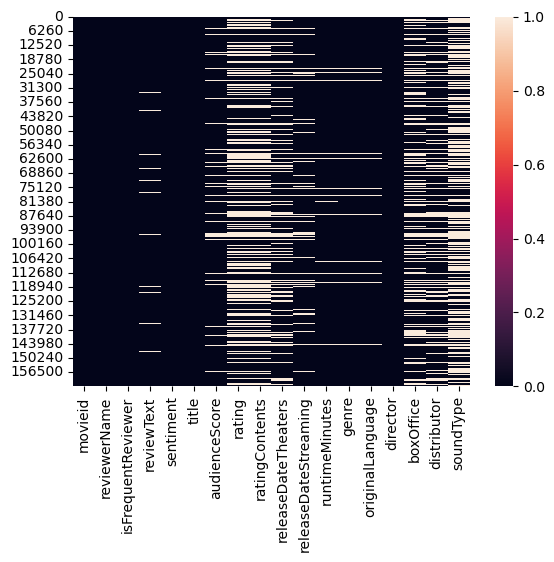

In [18]:
#check merged test dataset null values graphically using seaborn library of python
#here in train datsets null values distributed throughout the datsets.
#white patches in graph indicatin the null values in respective feature
sns.heatmap(df_train_merged.isnull())
plt.show()

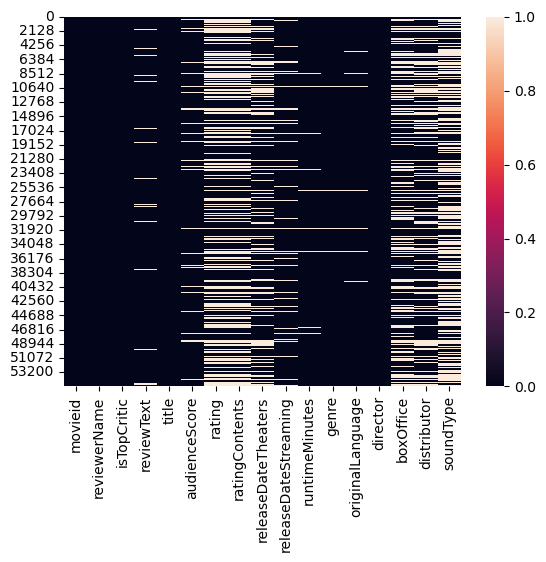

In [19]:
#check merged test dataset null values graphically
#in test datset also null values distributed throughout the datsets.
#white patches in graph indicatin the null values in respective feature
sns.heatmap(df_test_merged.isnull())
plt.show()

#### Check for class imbalance

In [20]:
#extreme class imbalances can lead to biased model performance.
#A significant imbalance can cause a model to be overly biased toward the majority class,
#resulting in poor performance on the minority class.
#check label column class imbalance; here label column has 67% positive class values and 33% negative class values,
#it means datset is imbalance 
#class imbalance can be solved by many ways such as SMOTE, undersampling, oversampling


df_train_merged['sentiment'].value_counts()/df_train_merged['sentiment'].shape[0]*100

POSITIVE    66.823751
NEGATIVE    33.176249
Name: sentiment, dtype: float64

Text(0.5, 1.0, 'Histogram Chart')

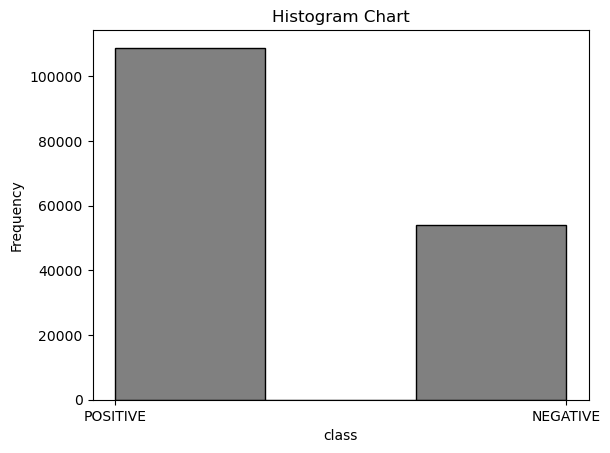

In [21]:
plt.hist(df_train_merged['sentiment'], bins=3, edgecolor='black', color='gray')
# Add labels and title
plt.xlabel('class')
plt.ylabel('Frequency')
plt.title( 'Histogram Chart', )

## Feature Engineering

#### performed below feature engineering type on datasets before fitting to model
#### 1.Feature construction
#### 2.Features Selection
#### 3.Feature Transformation ( Data preprocessing )

#### In merged test datasets the feature name "isTopCritic" has same values that available in train merged "isFrequentReviewer" feature, hence changing its name for easy understanding.

In [22]:
#change feature name
df_test_merged.rename(columns={'isTopCritic':'isFrequentReviewer'},inplace=True)

In [23]:
#check test datset after renaming 'isTopCritic'  with 'isFrequentReviewer'
df_test_merged.columns

Index(['movieid', 'reviewerName', 'isFrequentReviewer', 'reviewText', 'title',
       'audienceScore', 'rating', 'ratingContents', 'releaseDateTheaters',
       'releaseDateStreaming', 'runtimeMinutes', 'genre', 'originalLanguage',
       'director', 'boxOffice', 'distributor', 'soundType'],
      dtype='object')

#### drop features from dataset that has less useful to the sentiment polarity learning

In [24]:
#drop those categorical columns from datsets which are not relevent for making sentiment about movies
#this can be achieved by understanding actual content in features and domain knowledge.
#for numerical features it can be achieved by correlation metrix

train_merged=df_train_merged.drop(['movieid','sentiment',
                     'releaseDateTheaters', 'releaseDateStreaming'], axis=1)

#drop less relevent columns from test dataset
test_merged=df_test_merged.drop(['movieid',
                     'releaseDateTheaters', 'releaseDateStreaming'], axis=1)

In [25]:
test_merged.head(3)

,reviewerName,isFrequentReviewer,reviewText,title,audienceScore,rating,ratingContents,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,John Kim,False,Green slowly cranks up the dread with style an...,Legend Marty McFly Oracle,57.0,R,"['Gore', 'Bloody Horror Violence', 'Language T...",111.0,"Holiday, Horror, Mystery & thriller",English,Sara Barnett,$64.0M,Universal Pictures,Dolby Atmos
1,Brian Chaney,False,Philip Noyce's direction is elegant and unforc...,Terminator Katniss Everdeen Glimmer,86.0,PG,['Emotional Thematic Material'],94.0,"Drama, Adventure",English,Cindy Flander,$6.2M,Miramax Films,"Dolby SR, DTS, Dolby Stereo, Surround, SDDS, D..."
2,Danielle Parker,False,It wouldn't do to say what path Maria ultimate...,James Bond Labyrinth Gollum,62.0,NaN,NaN,NaN,Drama,French,Charlotte Bramble,NaN,NaN,NaN


#### 'Boxoffice' feature data type is string so need to extract the only numbers  

In [26]:
#the data in boxoffice feature contains amount but in thousand and milllion term
train_merged['boxOffice'].unique()

array([nan, '$115.7M', '$7.6M', ..., '$210.0K', '$111.2K', '$799.4K'],
      dtype=object)

In [27]:
# some of the values are not in string type, first convert it into string
train_merged['boxOffice']=train_merged['boxOffice'].astype(str)
test_merged['boxOffice']=test_merged['boxOffice'].astype(str)


In [28]:
#here function str_to_int is defined for removing $ and replacing K and multiplying with 1000, replacing M and multiplying with 1000000

def str_to_int(monetary_str):
    multiplier = 1
    if monetary_str[-1] == 'M':
        multiplier = 1000000
    elif monetary_str[-1] == 'K':
        multiplier = 1000
    else:
        return None

    value_str = monetary_str[1:-1]
    value = float(value_str) * multiplier
    return int(value)


#aplly this function on boxoffice column of train merged dataset
for i in range(train_merged['boxOffice'].shape[0]):
    train_merged['boxOffice'][i]=str_to_int(train_merged['boxOffice'][i])
    

/tmp/ipykernel_20/974928713.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_merged['boxOffice'][i]=str_to_int(train_merged['boxOffice'][i])


In [29]:
#aplly this function on boxoffice column of test merged dataset

for i in range(test_merged['boxOffice'].shape[0]):
    test_merged['boxOffice'][i]=str_to_int(test_merged['boxOffice'][i])

/tmp/ipykernel_20/1012501018.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_merged['boxOffice'][i]=str_to_int(test_merged['boxOffice'][i])


In [30]:
#check values in boxoffice column after applying str_to_int function
train_merged.head()

,reviewerName,isFrequentReviewer,reviewText,title,audienceScore,rating,ratingContents,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,Marvelous Pirate,65.0,PG-13,"['Violence', 'Brief Strong Language', 'Substan...",105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso,None,Netflix,NaN
1,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,Tony Montana Frodo Baggins V Rocky Balboa,NaN,NaN,NaN,91.0,Action,English,Alma White,None,NaN,NaN
2,Mr. Charles Burgess,True,Creed II does not give us anything but another...,Darth Vader Katniss Everdeen Sorcerer Donnie D...,80.0,PG-13,"['Language', 'A Scene of Sensuality', 'Sports ...",130.0,Drama,English,Bobby Oleary,115700000,"Warner Bros. Pictures, Metro-Goldwyn-Mayer",NaN
3,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",Lara Croft Glimmer,NaN,NaN,NaN,15.0,Drama,Spanish,Eric Hutcherson,None,NaN,NaN
4,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,Jason Bourne Surreal The Terminator Indiana Jones,97.0,R,"['Language', 'Drug Content', 'Sexuality', 'Str...",131.0,"Crime, Drama",Portuguese (Brazil),John Trent,7600000,Miramax Films,"Surround, Dolby SR, Dolby Digital, Dolby A, Do..."


In [31]:
# # some of the values are not in string type, first convert it into string
train_merged['boxOffice']=train_merged['boxOffice'].astype('float')
test_merged['boxOffice']=test_merged['boxOffice'].astype('float')

In [32]:
#check boxoffice feature datatype after feature engineering
test_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55315 entries, 0 to 55314
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   reviewerName        55315 non-null  object 
 1   isFrequentReviewer  55315 non-null  bool   
 2   reviewText          52805 non-null  object 
 3   title               55315 non-null  object 
 4   audienceScore       50384 non-null  float64
 5   rating              31019 non-null  object 
 6   ratingContents      31019 non-null  object 
 7   runtimeMinutes      54053 non-null  float64
 8   genre               54395 non-null  object 
 9   originalLanguage    54077 non-null  object 
 10  director            55315 non-null  object 
 11  boxOffice           35251 non-null  float64
 12  distributor         39719 non-null  object 
 13  soundType           24689 non-null  object 
dtypes: bool(1), float64(3), object(10)
memory usage: 8.0+ MB


In [33]:
#segregate numerical, categorical and text feature of df_train dataset for preprocessing separately using pipeline
#It is good practice to work separately with features with different datatypes which helps to avoid complexicity in coding.
#apply on train datasets
train_merged_cat=train_merged.drop(columns=['reviewText', 'audienceScore','ratingContents','title', 'runtimeMinutes', 'boxOffice'], axis=1)
train_merged_num=train_merged[['audienceScore', 'runtimeMinutes', 'boxOffice']]
train_merged_text=train_merged['reviewText']
train_merged_text1=train_merged['ratingContents']
train_merged_text2=train_merged['title']


#apply on test datsets
test_merged_cat=test_merged.drop(columns=['reviewText', 'audienceScore','ratingContents','title', 'runtimeMinutes', 'boxOffice'], axis=1)
test_merged_num=test_merged[['audienceScore', 'runtimeMinutes', 'boxOffice']]
test_merged_text=test_merged['reviewText']
test_merged_text1=test_merged['ratingContents']
test_merged_text2=test_merged['title']

In [34]:
train_merged_num.shape

(162758, 3)

In [35]:
train_merged_text1.head()

0    ['Violence', 'Brief Strong Language', 'Substan...
1                                                  NaN
2    ['Language', 'A Scene of Sensuality', 'Sports ...
3                                                  NaN
4    ['Language', 'Drug Content', 'Sexuality', 'Str...
Name: ratingContents, dtype: object

### Data Preprocessing

In [36]:
#separate lebel column from features columns ## in lebl column 33.17% values are Negative and 66.83% values are Positive 
#i.e data is not balanced
y=df_train_merged['sentiment']
y.value_counts()

POSITIVE    108761
NEGATIVE     53997
Name: sentiment, dtype: int64

In [37]:
#convert label y into numerical using label encode

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
y_enc=le.fit_transform(y)

#### Make Separate pipeline for numerical , categorical and text data preprocessing

In [38]:
train_merged.columns

Index(['reviewerName', 'isFrequentReviewer', 'reviewText', 'title',
       'audienceScore', 'rating', 'ratingContents', 'runtimeMinutes', 'genre',
       'originalLanguage', 'director', 'boxOffice', 'distributor',
       'soundType'],
      dtype='object')

In [39]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

num_pipe= make_pipeline(SimpleImputer(strategy="median"),MinMaxScaler())
cat_pipe= make_pipeline(SimpleImputer(strategy="most_frequent"),OneHotEncoder(handle_unknown="ignore"))

#fit and transform train dataset
num_pipe_train_merged=num_pipe.fit_transform(train_merged_num)
cat_pipe_train_merged=cat_pipe.fit_transform(train_merged_cat)

# apply transform on test dataset
num_pipe_test_merged=num_pipe.transform(test_merged_num)
cat_pipe_test_merged=cat_pipe.transform(test_merged_cat)

In [40]:
#check shape of categorical columns of train dataset after applying imputation and encoding
cat_pipe_train_merged.shape

(162758, 17267)

In [41]:

#check shape of categorical columns of test dataset after applying imputation and encoding
cat_pipe_test_merged.shape

(55315, 17267)

### Convert text data into numeric using Tfidf Vectorizer

##### Text data need to be convert into numeric, here Term frequency-Inverse Document Frequency(Tfidf) vectorizer method used

In [42]:
#first replace nan value of train text data with empty string
train_merged_text=train_merged_text.fillna('')
train_merged_text1=train_merged_text1.fillna('')
train_merged_text2=train_merged_text2.fillna('')


#first replace nan value of train text data with empty string
test_merged_text=test_merged_text.fillna('')
test_merged_text1=test_merged_text1.fillna('')
test_merged_text2=test_merged_text2.fillna('')

In [43]:
#converting text data into numerical 
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer=TfidfVectorizer(max_features=100000, ngram_range=(1, 2))
vectorizer1=TfidfVectorizer(ngram_range=(1, 6), max_features=30000 )
vectorizer2=TfidfVectorizer(max_features=199)

#apply vectorizer on train text data
vct_text_train_merged=vectorizer.fit_transform(train_merged_text)
vct_text_train_merged1=vectorizer1.fit_transform(train_merged_text1)
vct_text_train_merged2=vectorizer2.fit_transform(train_merged_text2)

#apply vectorizer on test text data
vct_text_test_merged=vectorizer.transform(test_merged_text)
vct_text_test_merged1=vectorizer1.transform(test_merged_text1)
vct_text_test_merged2=vectorizer2.transform(test_merged_text2)

In [44]:
vct_text_train_merged.shape

(162758, 100000)

In [45]:
vct_text_test_merged2.shape

(55315, 199)

### Join numerical , categorical and text data data using hstack method

In [46]:
# join transformed datasets
import scipy.sparse as sp

#join train transformed data
concatenated_train_merged = sp.hstack([num_pipe_train_merged,cat_pipe_train_merged ,vct_text_train_merged, vct_text_train_merged1, vct_text_train_merged2])

#join test transformed data
concatenated_test_merged = sp.hstack([num_pipe_test_merged,cat_pipe_test_merged ,vct_text_test_merged, vct_text_test_merged1, vct_text_test_merged2])

In [47]:
concatenated_train_merged.shape

(162758, 147469)

In [48]:
concatenated_test_merged.shape

(55315, 147469)

### Visualizing correlation in numerical features and label column

/tmp/ipykernel_20/447012160.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(corr_df_x_train.corr(), annot=True, vmin=-0.25, vmax=1)


<Axes: >

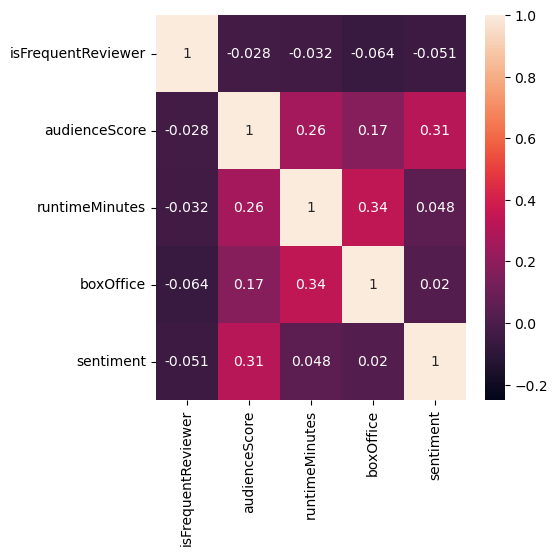

In [49]:
#to show correlation of features with label column using heatmap
#from this corr. heatmap we can infer that audience score has strong positive correlation (0.31) with sentiment (label column)
#isFrequentReviewer column has negative correlation with sentiment about negative 0.051 which is very low correlated.
#

corr_df_x_train=train_merged
corr_df_x_train['sentiment']=y_enc

plt.figure(figsize=(5, 5))
sns.heatmap(corr_df_x_train.corr(), annot=True, vmin=-0.25, vmax=1)

In [50]:
df_train_merged.columns

Index(['movieid', 'reviewerName', 'isFrequentReviewer', 'reviewText',
       'sentiment', 'title', 'audienceScore', 'rating', 'ratingContents',
       'releaseDateTheaters', 'releaseDateStreaming', 'runtimeMinutes',
       'genre', 'originalLanguage', 'director', 'boxOffice', 'distributor',
       'soundType'],
      dtype='object')

### check outliers

<Axes: >

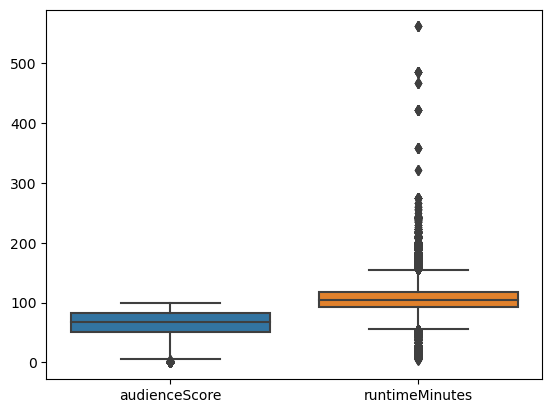

In [51]:
#draw boxplot for numerical columns for checking outliers in audienceScore column and runtimeMinute

sns.boxplot(corr_df_x_train[['audienceScore', 'runtimeMinutes']])

## Feature Selection

#### Select best features using Select k Best features Selection method

In [52]:
#select features 
from sklearn.feature_selection import SelectKBest, chi2

k = 110000 # Number of top features to select
selector = SelectKBest(score_func=chi2, k=k)

#apply on train data
train_merged_skb= selector.fit_transform(concatenated_train_merged, y_enc)

#apply on test data
test_merged_skb=selector.transform(concatenated_test_merged)

In [53]:
train_merged_skb.shape

(162758, 110000)

In [54]:
test_merged_skb.shape

(55315, 110000)

In [55]:
X=train_merged_skb

### Spliting training dataset into training and validation data

In [56]:
#split datasets into train and validation
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val=train_test_split(X, y_enc, test_size=0.2, stratify=y_enc, random_state=42)

In [57]:
#check shape
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((130206, 110000), (32552, 110000), (130206,), (32552,))

### Select model-1 for training data :Logistic Regression

In [58]:
#train model 1 Logistic Regression
import time 
lr_start=time.time()

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

#select hyperparameters for tunning
param_grid_lr={"C":[10, 100], "penalty":["l1","l2"]} # l1 lasso l2 ridge

#select estimator
estimator_lr=LogisticRegression(max_iter=400, solver='liblinear')
 
RandomizedSearchCV_lr=RandomizedSearchCV(estimator_lr, param_grid_lr, cv=5, n_jobs=-1, n_iter=4)
#fit Gridsearch CV on train data

RandomizedSearchCV_lr.fit(train_merged_skb, y_enc)

lr_end=time.time()

In [59]:
ct_lr=print("Computational_time_lr=", lr_end-lr_start)

Computational_time_lr= 863.4475464820862


In [60]:
#make prediction on test data
y_pred_lr=RandomizedSearchCV_lr.predict(X_val)

In [61]:
#best combination of hyperparameter
print("Best Hyperparameters: ", RandomizedSearchCV_lr.best_params_)
print("Best Accuracy: ", RandomizedSearchCV_lr.best_score_)

Best Hyperparameters:  {'penalty': 'l2', 'C': 10}
Best Accuracy:  0.8445422033121792


In [62]:
#calculating f1 score for log reg
from sklearn.metrics import f1_score, accuracy_score

accuraccy_lr=accuracy_score(y_val, y_pred_lr)
f1_score_lr=f1_score(y_val, y_pred_lr, average="micro")

In [63]:
print('accuraccy_lr', accuraccy_lr)
print('f1_score_lr', f1_score_lr)

accuraccy_lr 0.9538891619562546
f1_score_lr 0.9538891619562546


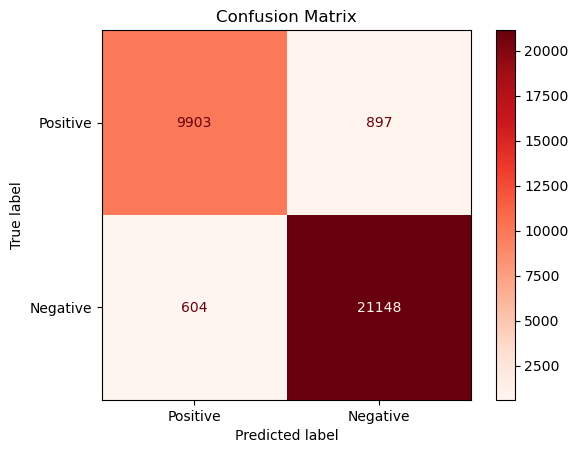

In [64]:
#create confusion matrix for log regression model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

con_mat_lr = confusion_matrix(y_val, y_pred_lr)

# Display the confusion matrix as a heatmap
labels = ['Positive', 'Negative']
disp = ConfusionMatrixDisplay(confusion_matrix=con_mat_lr, display_labels=labels)
disp.plot(cmap='Reds', values_format='d')

plt.title('Confusion Matrix')
plt.show()

In [65]:
#classification matrix for log regression
from sklearn.metrics import classification_report

target_names=['POSITIVE', 'NEGATIVE']
report_lr = classification_report(y_val, y_pred_lr, target_names=target_names)
print(report_lr)

              precision    recall  f1-score   support

    POSITIVE       0.94      0.92      0.93     10800
    NEGATIVE       0.96      0.97      0.97     21752

    accuracy                           0.95     32552
   macro avg       0.95      0.94      0.95     32552
weighted avg       0.95      0.95      0.95     32552



### Select model-2 for training data :Multinomial Bayes Classifier

In [66]:
#train model-2 Multinomial Naive Bayes classifier
mnb_start=time.time()

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV

#select hyperparameters for tunning
param_grid_mnb={'alpha': [0.00001, 0.0001,0.001,  0.01, 1.0],
    'fit_prior': [True, False] }

#select estimator
estimator=MultinomialNB()
RandomizedSearchCV_mnb=RandomizedSearchCV(estimator,param_grid_mnb, cv=4, scoring="accuracy"  )

#fit RandomizedSearchCV on train data
RandomizedSearchCV_mnb.fit(train_merged_skb, y_enc)

mnb_end=time.time()

In [67]:
ct_mnb=print("Computational_time_mnb=", mnb_end-mnb_start)

Computational_time_mnb= 4.9763171672821045


In [68]:
#make prediction on test data
y_pred_mnb= RandomizedSearchCV_mnb.predict(X_val)

In [69]:
#best combination of hyperparameter
print("Best Hyperparameters: ", RandomizedSearchCV_mnb.best_params_)
print("Best Accuracy: ", RandomizedSearchCV_mnb.best_score_)

Best Hyperparameters:  {'fit_prior': True, 'alpha': 0.0001}
Best Accuracy:  0.8041202312470472


In [70]:
#calculating f1 score for mnb classifier
from sklearn.metrics import f1_score, accuracy_score

accuraccy_mnb=accuracy_score(y_val, y_pred_mnb)
f1_score_mnb=f1_score(y_val, y_pred_mnb, average="micro")

In [71]:
print('accuraccy_mnb', accuraccy_mnb)
print('f1_score_mnb', f1_score_mnb)

accuraccy_mnb 0.8537109855001229
f1_score_mnb 0.8537109855001229


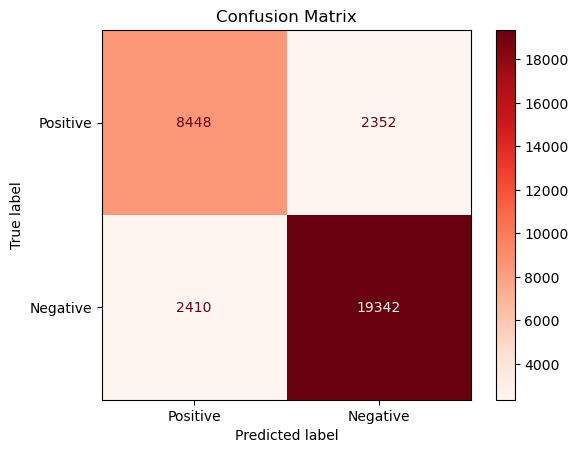

In [72]:
#create confusion matrix for Multinomial bayes classifier model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

con_mat_mnb = confusion_matrix(y_val, y_pred_mnb)

# Display the confusion matrix as a heatmap
labels = ['Positive', 'Negative']
disp = ConfusionMatrixDisplay(confusion_matrix=con_mat_mnb, display_labels=labels)
disp.plot(cmap='Reds', values_format='d')

plt.title('Confusion Matrix')
plt.show()

In [73]:
#classification matrix for Multinomial bayes classifier
from sklearn.metrics import classification_report

target_names=['POSITIVE', 'NEGATIVE']
report_mnb = classification_report(y_val, y_pred_mnb, target_names=target_names)
print(report_mnb)

              precision    recall  f1-score   support

    POSITIVE       0.78      0.78      0.78     10800
    NEGATIVE       0.89      0.89      0.89     21752

    accuracy                           0.85     32552
   macro avg       0.83      0.84      0.84     32552
weighted avg       0.85      0.85      0.85     32552



### Select model-3 for training data : Multilayer Perceptron Classifier

In [74]:
#train model-3 Multi layer Perceptron Classifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier

mlp_start=time.time()

##slect parameter grid
param_grid_mlp= {
    'hidden_layer_sizes': [2],'activation': ['logistic', 'relu'],'alpha': [0.1]
            }

#create estimator
estimator_mlp = MLPClassifier(max_iter=4)

RandomizedSearchCV_mlp = RandomizedSearchCV(estimator_mlp, param_grid_mlp, cv=2, n_jobs=-1, n_iter=3)

#fit Gridsearch CV on train data
RandomizedSearchCV_mlp.fit(train_merged_skb, y_enc)

mlp_end=time.time()

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.

In [75]:
ct_mlp=print("Computational_time_mlp=", mlp_end-mlp_start)

Computational_time_mlp= 40.51955842971802


In [76]:
#make prediction on test data
y_pred_mlp= RandomizedSearchCV_mlp.predict(X_val)

In [77]:
#best combination of hyperparameter

print("Best Hyperparameters: ", RandomizedSearchCV_mlp.best_params_)
print("Best Accuracy: ", RandomizedSearchCV_mlp.best_score_)

Best Hyperparameters:  {'hidden_layer_sizes': 2, 'alpha': 0.1, 'activation': 'relu'}
Best Accuracy:  0.7339915703068359


In [78]:
#calculating f1 score for mnb classifier
from sklearn.metrics import f1_score, accuracy_score

accuraccy_mlp=accuracy_score(y_val, y_pred_mlp)
f1_score_mlp=f1_score(y_val, y_pred_mlp, average="micro")

In [79]:
print('accuraccy_mlp', accuraccy_mlp)
print('f1_score_mlp', f1_score_mlp)

accuraccy_mlp 0.8199803391496682
f1_score_mlp 0.8199803391496682


In [80]:
#classification matrix for Multi layer Perceptron Classifier
from sklearn.metrics import classification_report

target_names=['POSITIVE', 'NEGATIVE']
report_mnp = classification_report(y_val, y_pred_mlp, target_names=target_names)
print(report_mnp)

              precision    recall  f1-score   support

    POSITIVE       0.82      0.59      0.69     10800
    NEGATIVE       0.82      0.93      0.87     21752

    accuracy                           0.82     32552
   macro avg       0.82      0.76      0.78     32552
weighted avg       0.82      0.82      0.81     32552



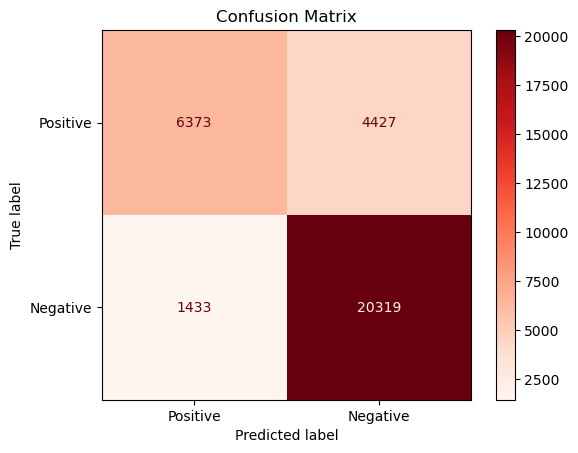

In [81]:
#create confusion matrix for MLP model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

con_mat_mlp = confusion_matrix(y_val, y_pred_mlp)

# Display the confusion matrix as a heatmap
labels = ['Positive', 'Negative']
disp = ConfusionMatrixDisplay(confusion_matrix=con_mat_mlp, display_labels=labels)
disp.plot(cmap='Reds', values_format='d')

plt.title('Confusion Matrix')
plt.show()

In [82]:
#Computational time of all models and their respective f1_score

print("Computational_time_lr=", lr_end-lr_start, "      F1 Score", f1_score_lr )
print("Computational_time_mnb=", mnb_end-mnb_start, "      F1 Score", f1_score_mnb )
print("Computational_time_mlp=", mlp_end-mlp_start, "      F1 Score", f1_score_mlp )

Computational_time_lr= 863.4475464820862       F1 Score 0.9538891619562546
Computational_time_mnb= 4.9763171672821045       F1 Score 0.8537109855001229
Computational_time_mlp= 40.51955842971802       F1 Score 0.8199803391496682


### 1.  Logistic Regression model performing better on validation dataset and also computational time is less as compared to Multinomial Naive Bayes and MLP Classifier.
### 2.  Also log reg. performance is slightly similar to mlp classifier but computational time 
### is very high. Hence chose log. regression for predicting test dataset.

In [83]:
#log regression giving best result than multinpmial NB and Support Vector Machine Classifier 
#hence use this result for making prediction on test datasets

y_test_pred_lr=RandomizedSearchCV_lr.predict(test_merged_skb)

In [84]:
submission=pd.DataFrame(columns=['id', 'sentiment'])
submission['id']=[i for i in range(len(y_test_pred_lr))]
pred_list=[]
for j in y_test_pred_lr:
    if j==1:
        pred_list.append('POSITIVE')
    else:
        pred_list.append('NEGATIVE')
submission["sentiment"]=pred_list
submission.to_csv('submission.csv',index=False)

In [85]:
submission

,id,sentiment
0,0,POSITIVE
1,1,POSITIVE
2,2,POSITIVE
3,3,POSITIVE
4,4,POSITIVE
...,...,...
55310,55310,POSITIVE
55311,55311,POSITIVE
55312,55312,NEGATIVE
55313,55313,POSITIVE
